# 古典线性回归
"最小二乘法"（ Ordinary Least Square，记 OLS）是单一方程线性回归模型最常见、最基本的估计方法。

## 样本数据
### 导入数据

In [1]:
import pandas as pd

df = pd.read_excel('./数据/上证指数与沪深300.xlsx')
df['日期'] = pd.to_datetime(df['日期'])   # 将字符串转为日期格式
df.head()

,日期,hs300,sz
0,2018-01-02,4087.4012,3348.3259
1,2018-01-03,4111.3925,3369.1084
2,2018-01-04,4128.8119,3385.7102
3,2018-01-05,4138.7505,3391.7501
4,2018-01-08,4160.1595,3409.4795


In [2]:
df.describe()   # 描述性统计

,hs300,sz
count,460.000000,460.000000
mean,3664.266460,2930.237842
std,333.651406,243.874533
min,2964.842100,2464.362800
25%,3364.816625,2746.438775
50%,3762.250200,2917.781900
75%,3897.218650,3095.709675
max,4389.885300,3559.465300


### 绘制图形
#### 两指数走势图

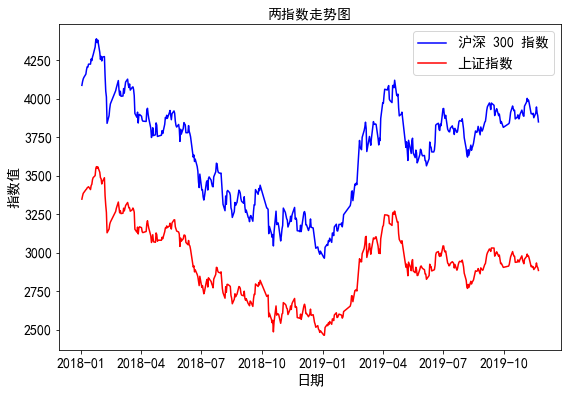

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from pylab import mpl

# 防止图形中文文字乱码
mpl.rcParams['font.sans-serif'] = ['SimHei']   # 以黑体的字体显示中文
mpl.rcParams['axes.unicode_minus'] = False   # 解决保存图像是负号'-'显示为方块的问题

plt.figure(figsize=(9,6))   # 设置图形大小
plt.title('两指数走势图', fontsize=14)   # 标题，fontsize 为字体大小
# 常见线的属性有：color, label, linewidth, linestyle, marker 等
plt.plot(df['日期'], df['hs300'], color='blue', label='沪深 300 指数')
plt.plot(df['日期'], df['sz'], color='red', label='上证指数')
plt.legend(fontsize=14)  # 显示上面的 label
plt.xticks(fontsize=14)  # x轴文字设置
plt.yticks(fontsize=14)
plt.xlabel('日期', fontsize=14)
plt.ylabel('指数值', fontsize=14)
# plt.axis([0, 2*np.pi, -1, 1])   #设置坐标范围 axis([xmin,xmax,ymin,ymax])
# plt.ylim(-1,1)   #仅设置 y 轴坐标范围
plt.show()

#### 散点图

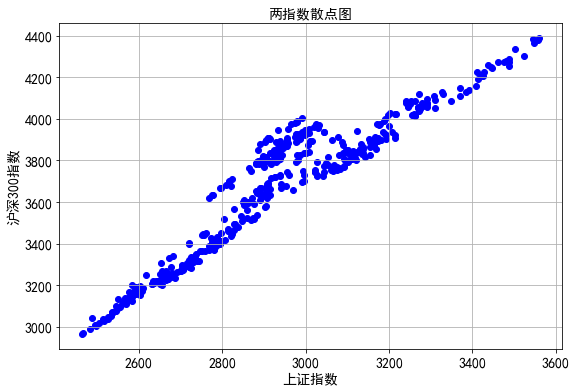

In [4]:
plt.figure(figsize=(9,6))
plt.scatter(x=df['sz'], y=df['hs300'], c='b', marker='o')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('两指数散点图', fontsize=14)
plt.xlabel('上证指数', fontsize=14)
plt.ylabel('沪深300指数', fontsize=14)
plt.grid()

## 原理讲解

### 古典线性回归模型的假定

#### 假定1：线性假定

总体模型为:$y_i=\beta_1x_{i1}+\beta_2x_{i2}+\cdots+\beta_Kx_{iK}+\varepsilon_i (i=1,\cdots,n)\tag{1}$            

其中 $n$ 为样本容量，解释变量 $x_{ik}$ 的第一个下标表示第 $i$ 个“观测值”，而第二个下标则表示第 $k$ 个解释变量$(k=1,\cdots,K)$，共有 $K$个 解释变量。如果有常数项，则通常令第一个解释变量为单位向量，即 $x_{i1}=1$

为了更简洁地表达，下面引入矩阵符号。把方程（1）的所有解释变量和参数都写成向量，记第 $i$ 个观测数据为$x_i\equiv\left(x_{i 1} ,x_{i_{2}} \cdots x_{i K}\right)^{\prime}$，$\beta \equiv\left(\beta_{1}, \beta_{2} \cdots \beta_{K}\right)^{\prime}$，则方程（1）为：

$y_{i}=x_{i}^{\prime} \boldsymbol{\beta}+\varepsilon_{i} \quad(i=1, \cdots, n)\tag{2}$

#### 假定2：严格外生性

$\mathrm{E}\left(\varepsilon_{i} | X\right)=\mathrm{E}\left(\boldsymbol{\varepsilon}_{i} | x_{1}, \cdots, x_{n}\right)=0 \quad(i=1, \cdots, n)\tag{3}$

#### 假定3：不存在“严格多重共线性”（strict multicolinearity），即数据矩阵 $X$ 满列秩

#### 假定4：球型扰动项（spherical disturbance），即扰动项满足“同方差”、“无自相关”的性质

$\operatorname{Var}(\boldsymbol{\varepsilon} | X)=\mathrm{E}\left(\boldsymbol{\varepsilon} \boldsymbol{\varepsilon}^{\prime} | X\right)=\sigma^{2} \boldsymbol{I}_{n}=\left(\begin{array}{ccc}\sigma^{2} & & 0 \\ & \ddots & \\ 0 & & \sigma^{2}\end{array}\right)\tag{4}$

### 最小二乘法
假定待估计方程为：$hs300 = c+sz$。其中 c 为常数项

#### OLS 估计量 b

$$b \equiv\left(X^{\prime} X\right)^{-1} X^{\prime} y\tag{5}$$

In [5]:
import numpy as np

n = df.shape[0]   # 样本容量
beta = np.array(df['sz']).reshape(n,1)
c = np.ones((n,1))   # 常数项
X = np.hstack((c,beta))   # hstack()在行上合并，vstack()在列上合并
y = np.array(df['hs300']).reshape(n,1)

b = np.linalg.inv(X.T @ X) @ X.T @ y
print('OLS估计值为：\n',b)

OLS估计值为：
 [[-124.69031687]
 [   1.29305435]]


#### 残差 $e$

$$e \equiv\left(\begin{array}{llll}
e_{1},e_{2},\cdots,e_{n}
\end{array}\right)=y-X \widetilde{\beta}\tag{6}$$

In [6]:
e = y - X @ b

#### 扰动项方差 $s^{2}$

对于扰动项方差$\sigma^{2}=\operatorname{Var}\left(\varepsilon_{i}\right)$，由于总体扰动项 $\varepsilon$ 不可观测，而样本残差 $e$ 可以近似地看成是 $\varepsilon$ 的实现值，故使用以下统计量作为对方差 $\sigma^{2}$ 的估计：
$$s^{2} \equiv \frac{1}{n-K} \sum_{i=1}^{n} e_{i}^{2}\tag{7}$$

In [7]:
K = X.ndim
SSE = e.T @ e
s2 = SSE/(n-K) 

import math 
s = math.sqrt(s2)

print('平方和：', SSE)
print('扰动项方差', s2)
print('扰动项标准差', s)

平方和： [[5453855.41555515]]
扰动项方差 [[11907.98125667]]
扰动项标准差 109.12369704454952


#### 估计量 b 的方差-协方差矩阵

$$\operatorname{Var}(b | X)=\boldsymbol{\sigma}^{2}\left(X^{\prime} X\right)^{-1}\tag{8}$$

In [8]:
Varb = s2 * np.linalg.inv(X.T @ X)

print('协方差矩阵：\n', Varb)

协方差矩阵：
 [[ 3.77128774e+03 -1.27819004e+00]
 [-1.27819004e+00  4.36206925e-04]]


#### 置信区间

由于 $\frac{b_{k}-\beta_{k}}{\mathrm{SE}\left(b_{k}\right)} \sim t(n-K)$，根据 $t_{\alpha/2}$ 得：
$$\mathrm{P}\left\{-t_{\alpha / 2}<\frac{b_{k}-\beta_{k}}{\mathrm{SE}\left(b_{k}\right)}<t_{\alpha / 2}\right\}=1-\alpha\tag{9}$$

$$P\left\{b_{k}-t_{\alpha / 2} \operatorname{SE}\left(b_{k}\right)<\boldsymbol{\beta}_{k}<b_{k}+t_{\alpha / 2} \operatorname{SE}\left(b_{k}\right)\right\}=1-\alpha\tag{10}$$

In [9]:
from scipy. stats import t

alpha = 0.05   # 置信度
nu = max(0,n-K)   # 自由度
tval = t.ppf(1-alpha/2,nu)   # 逆函数值
SE_b = np.sqrt(np.diag(Varb)).reshape(K,1)
bint = np.hstack((b-tval*SE_b,b+tval*SE_b))
print('95% 置信区间：\n', bint)

95% 置信区间：
 [[-245.37220852   -4.00842522]
 [   1.25201092    1.33409777]]


#### t 检验

$$t_{k} \equiv \frac{b_{k}-\bar{\beta}_{k}}{\mathrm{SE}\left(b_{k}\right)} \equiv \frac{b_{k}-\bar{\beta}_{k}}{\sqrt{s^{2}\left(X^{\prime} X\right)_{k k}^{-1}}} \sim t(n-K)\tag{11}$$

<div align=center><img src="https://lei-picture.oss-cn-beijing.aliyuncs.com/img/20200423133127.png" width="450"></div>

In [10]:
t_stat = b/SE_b
t_p = 2*(1-t.cdf(abs(t_stat),n-K))

print('t检验为：\n', t_stat)
print('\n')
print('p值为：\n', t_p)

t检验为：
 [[-2.0304294 ]
 [61.91138223]]


p值为：
 [[0.0428902]
 [0.       ]]


#### 两类错误

根据样本信息对总体进行推断，有可能犯错误。特别地，在进行假设检验时，可能犯两类性质不同的错误。

**第Ⅰ类错误**：虽然原假设为真，但却根据观测数据做出了拒绝原假设的错误判断，即“弃真”。

**第Ⅱ类错误**：虽然原假设为假（替代假设为真），但却根据观测数据做出了接受原假设的错误判断，即“存伪”。

由于在进行假设检验时，通常知道第Ⅰ类错误的发生概率，而不知道第Ⅱ类错误的发生概率。因此，如果拒绝原假设，可以比较理直气壮，因为知道犯错误的概率就是显著性水平（比如5%）；另一方面，如果接受原假设，则比较没有把握，因为我们通常并不知道第Ⅱ类错误的发生概率（可能很高）。

## 使用 statsmodels 库实现
### 线性回归估计

In [11]:
import statsmodels.api as sm

# sm.add_constant(data, prepend=False)
mod = sm.OLS(y, X)
res = mod.fit()
res.summary()   # 展示估计结果

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     3833.
Date:                Sun, 31 May 2020   Prob (F-statistic):          1.20e-224
Time:                        17:10:48   Log-Likelihood:                -2810.3
No. Observations:                 460   AIC:                             5625.
Df Residuals:                     458   BIC:                             5633.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -124.6903     61.411     -2.030      0.043    -245.372      -4.008
x1             1.2931      0.021     61.911      0.000       1.252       1.334
==============================================================================
Omnibus:                       61.627   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.387
Skew:                           1.031   Prob(JB):                     7.81e-19
Kurtosis:                       2.692   Cond. No.                     3.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 常用命令

In [12]:
res.params   # 获取估计参数值

array([-124.69031687,    1.29305435])

In [13]:
res.bse   # 获取标准差

array([6.14108113e+01, 2.08855674e-02])

In [14]:
resid = res.resid   # 获取残差
print(resid[:5])   # 只打印前五个

[-117.4758394  -120.35744134 -124.40507098 -122.27638992 -123.79246764]


In [15]:
res.cov_params()   # 获取协方差矩阵

array([[ 3.77128774e+03, -1.27819004e+00],
       [-1.27819004e+00,  4.36206925e-04]])

In [16]:
res.f_test("x1 = 0")   # Wald检验

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[3833.01924991]]), p=1.195406827896976e-224, df_denom=458, df_num=1>

### 线性拟合示意图

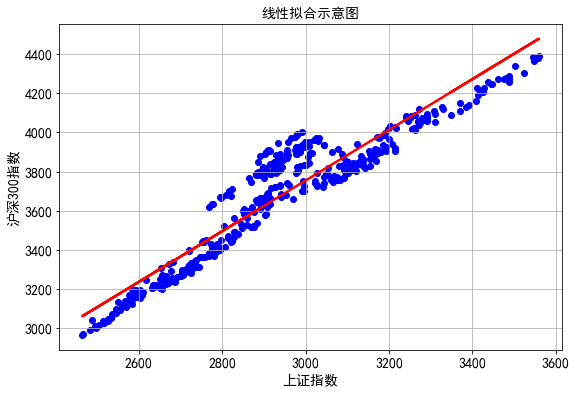

In [17]:
plt.figure(figsize=(9,6))
plt.scatter(x=df['sz'], y=df['hs300'], c='b', marker='o')
plt.plot(df['sz'], res.params[0]+res.params[1]*df['sz'], '-r', lw=2.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('线性拟合示意图', fontsize=14)
plt.xlabel('上证指数', fontsize=14)
plt.ylabel('沪深300指数', fontsize=14)
plt.grid()

## matlab实现
### 原理实现

```matlab
function [B,resid,siga2,bint,cov_matrix,t,t_p] = OLS_regress(Y,X)

%输入变量:
%Y - 被解释变量
%X - 解释变量

%输出变量:
% B - 待估计参数beta
% resid - 残差
% siga2 - 残差方差
% bint - 95%置信区间序列
% cov_matrix - 协方差矩阵

% 1.求OLS估计量B
B = inv(X'*X)*X'*Y;

% 2.计算协方差矩阵
resid = Y - X*B;  %残差
[n,K] = size(X);  
siga2 = sum(resid.^2)/(n-K);
cov_matrix = siga2*inv(X'*X);

% 3.t检验
t = B./sqrt(diag(cov_matrix));
t_p = 2*(1-tcdf(abs(t),n-K));

% 4.计算95%置信区间
alpha = 0.05;   %置信度
nu = max(0,n-K);  %自由度
tval = tinv(1-alpha/2,nu);
se = sqrt(diag(cov_matrix));
bint = [B-tval*se, B+tval*se];
```

### regress 函数介绍
#### 参数解释
* B：回归系数，是个向量（the vector of regression coefficients in the linear model Y =X*B）。
* BINT：回归系数的区间估计（matrix BINT of95% confidence intervals for B）。
* R：残差（vector of residuals）。
* RINT：置信区间（matrix RINT of intervals that can be used to diagnose outliers）。
* STATS：用于检验回归模型的统计量。有 4 数值：判定系数 $R^2$，F 统计量观测值，检验的 p 的值，误差方差的估计。
* ALPHA：显著性水平（缺少时为默认值 0.05）。

#### 使用实例
```matlab
% 1.载入数据
data = xlsread('./数据/hourse.xlsx');
f1 = data(:,2); f2 = data(:,3); e = data(:,6);

% 2.作线性回归 f1=e
[B,BINT,R,RINT,STATS] = regress(f1,e);

% 3.作线性回归 f1=c+e
[B,BINT,R,RINT,STATS] = regress(f1,[ones(length(f1),1),e]);

% 4.作线性回归 f1=c+f2+e
[B,BINT,R,RINT,STATS] = regress(f1,[ones(length(f1),1),f2,e]);
```